In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch
from matplotlib.gridspec import GridSpecFromSubplotSpec

import networkx as nx

import os
import os.path as op

import importlib

import dgsp
import graph_examples as dgsp_graphs
import plotting as dgsp_plot

import bimod_plots as plot

In [2]:
path_to_figures = "./figures/01-BiMod-antimod"

os.makedirs(path_to_figures, exist_ok=True)

159


IndexError: string index out of range

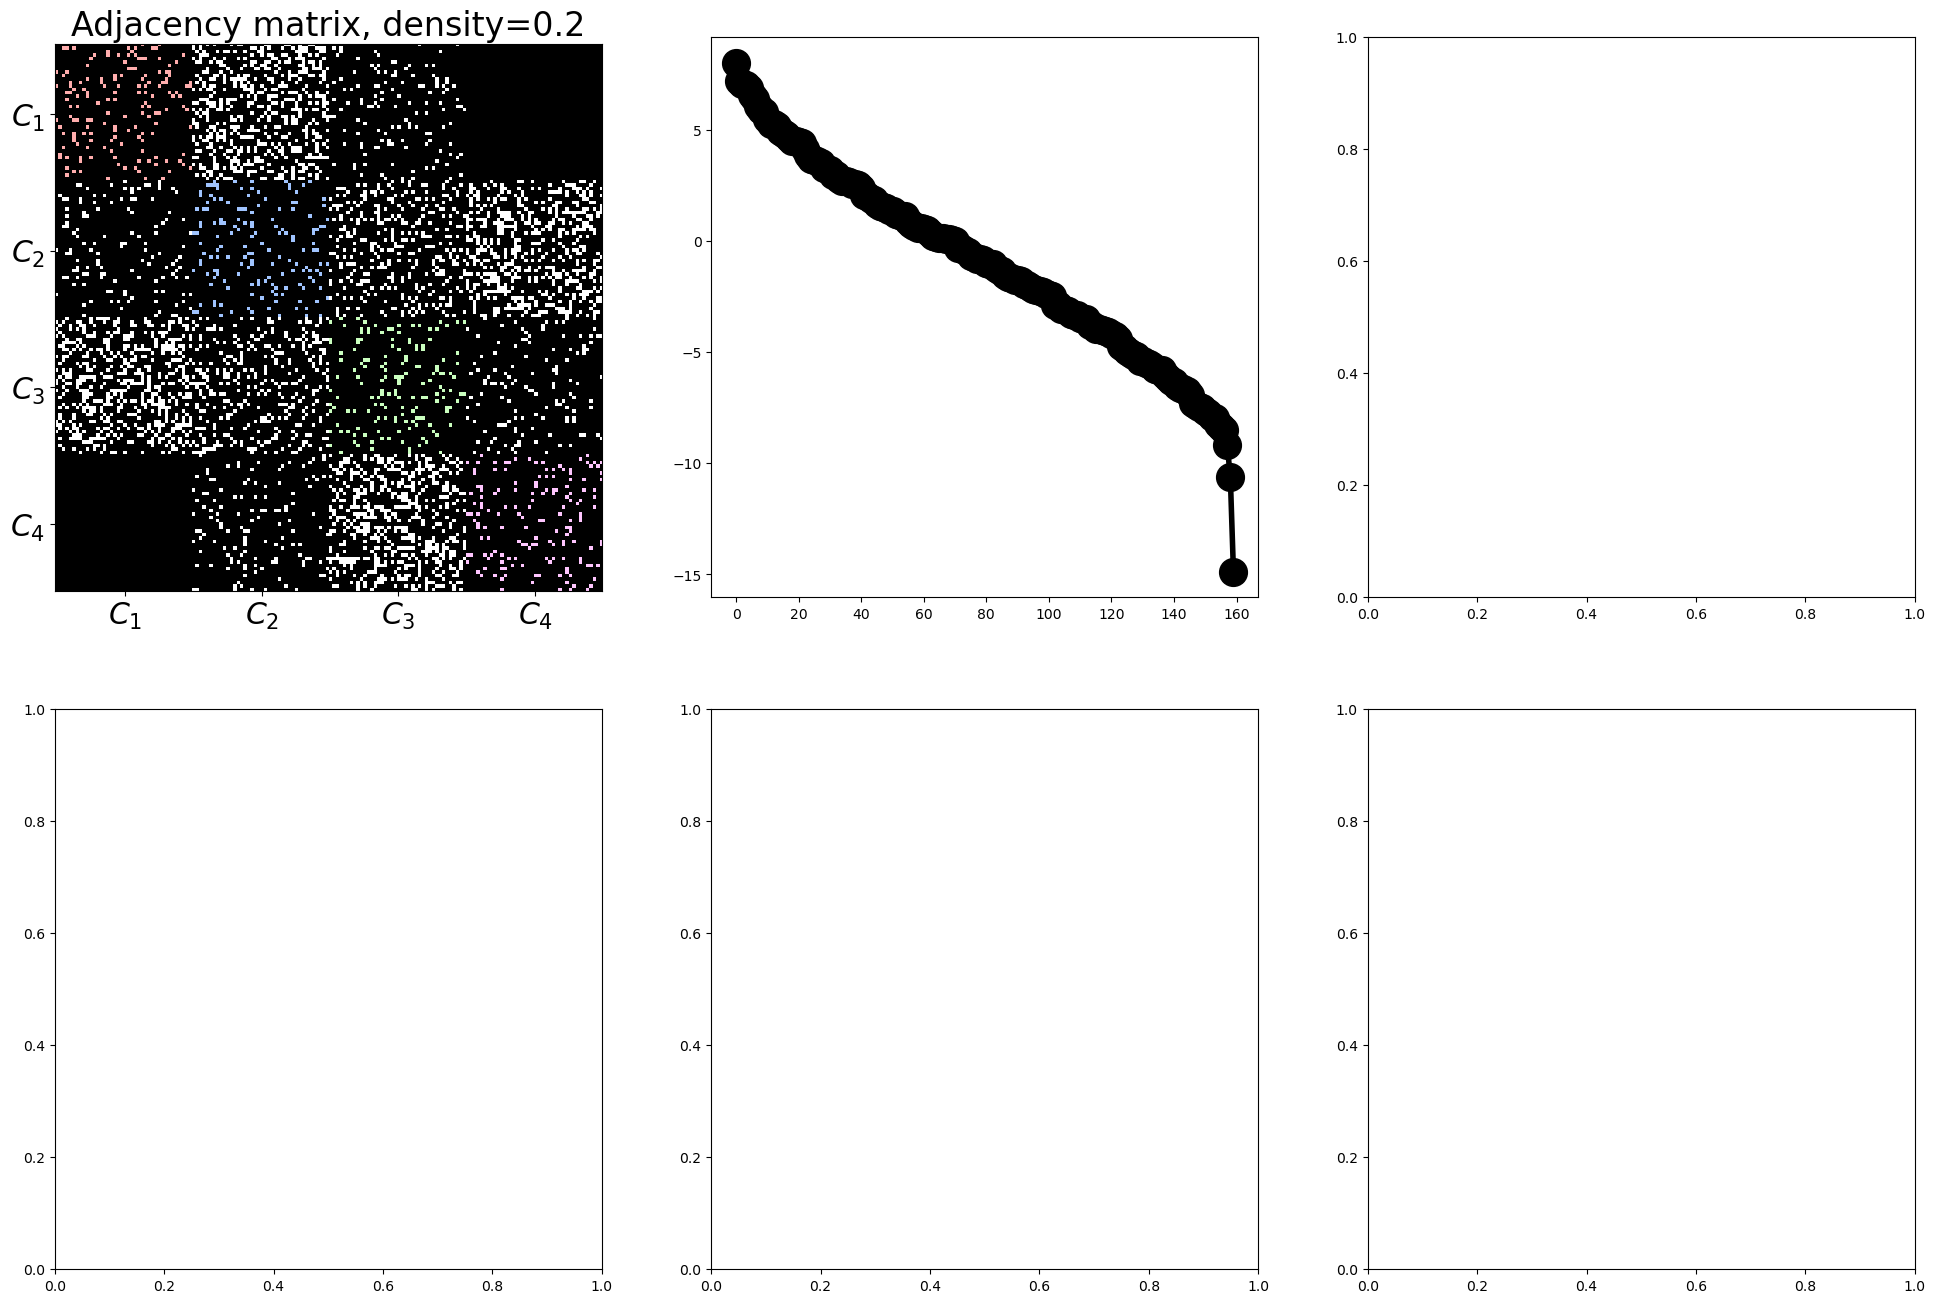

In [4]:
importlib.reload(plot)
importlib.reload(dgsp)
#plot.plot_community_scheme()

n_per_com = 40
density_value = .4
fix_negative = True

densities = [.2, .22]

fig, all_axes = plt.subplots(len(densities), 3, figsize=(3*8, 8*len(densities)))
for d, axes in zip(densities, all_axes):
    # Building the graph
    graph = dgsp_graphs.toy_n_communities(n_per_com, 4, com_density=d,
                                        connect_density=[density_value, density_value, 0, 
                                                        density_value, density_value, density_value],
                                        #connect_density=[1, 1, 0, 1, 1, 1],
                                        connect_out_prob=[0.8, 1-0.8, 1-0.8, 0.5, 0.8, 1-0.8], seed=1234)
    
    U, S, V = dgsp.sorted_SVD(dgsp.modularity_matrix(graph), fix_negative=fix_negative)
    vect_id = np.argmax(np.abs(S))

    print(vect_id)

    plot.plot_adjacency(graph, ax=axes[0], override_title=f"Adjacency matrix, density={d}")
    plot.plot_spectrum(graph, vector_id=vect_id, fig=fig, ax=axes[1], fix_negative=fix_negative)
    plot.plot_graph_embedding(graph, vector_id=vect_id, ax=axes[2], directed_edges=False, fix_negative=fix_negative)

#fig.savefig(op.join(path_to_figures, "SI-AntiMod-Synth.png"), bbox_inches='tight', dpi=100)

KeyboardInterrupt: 

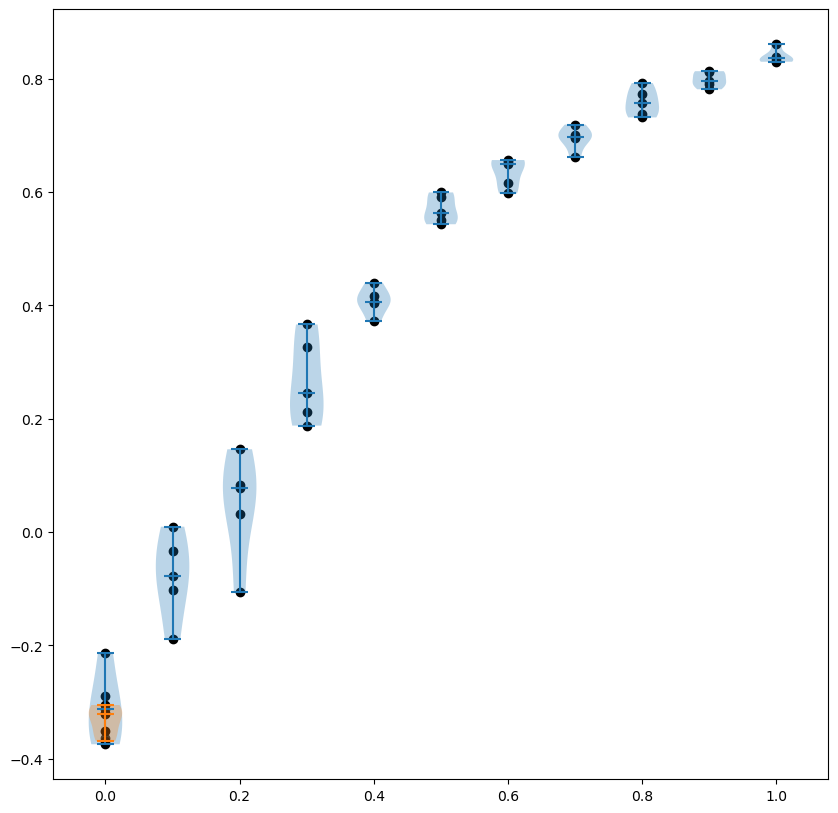

In [5]:
importlib.reload(plot)
from tqdm.notebook import tqdm
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

#plot.plot_community_scheme()

n_trials = 5
n_per_com = 20
density_value = .6
for_overleaf = True

densities = np.linspace(0, 1, 11)
#con_dens = [0.2, 0.5, 0.75, 1]
con_dens = [0.2, 0.4, 0.6, 0.8, 1]

colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple']
cmap = plt.get_cmap("tab10", 10)
colors = [cmap(i) for i in range(10)]

fig, all_axes = plt.subplots(figsize=(10, 10))

uv_medians = np.zeros((len(con_dens), len(densities)))

for j, c in enumerate(con_dens):
    for k, d in enumerate(densities):
        s = []
        uv_angle = []
        for n in range(n_trials):
            # Building the graph
            seed = np.random.randint(0, 1000)
            graph = dgsp_graphs.toy_n_communities(n_per_com, 4, com_density=d,
                                                connect_density=[c, c, 0, c, c, c],
                                                #connect_density=[1, 1, 0, 1, 1, 1],
                                                connect_out_prob=[0.8, 1-0.8, 1-0.8, 0.5, 0.8, 1-0.8], seed=seed+n)#, seed=1234)
            
            U, S, Vh = dgsp.sorted_SVD(dgsp.modularity_matrix(graph), fix_negative=False)
            V = Vh.T
            vect_id = np.argmax(np.abs(S))


            #u_v_angle = U[:, vect_id].T @ V[:, vect_id]
            u_v_angle = V[:, vect_id] @ U[:, vect_id].T

            s.append(S[vect_id])
            uv_angle.append(u_v_angle)
        
        uv_medians[j, k] = np.median(uv_angle)
            
        all_axes.scatter([d]*len(uv_angle), uv_angle, color='k')
        parts = all_axes.violinplot(uv_angle, positions=[d], widths=0.05, showmedians=True)
        #parts = all_axes.violinplot(uv_angle, positions=[d/c], widths=0.2, showmedians=True)
        for pc in parts['bodies']:
            pc.set_facecolor(colors[j])
        parts['cmedians'].set_edgecolor(colors[j])
        parts["cmaxes"].set_edgecolor(colors[j])
        parts["cmins"].set_edgecolor(colors[j])
        parts["cbars"].set_edgecolor(colors[j])

#all_axes.plot(uv_medians.T)
legend_elements = [Patch(facecolor=col, alpha=.5, edgecolor=col, label=f"{c:1.2f}") for col, c in zip(colors, con_dens)]

# Create the figure
all_axes.legend(handles=legend_elements, loc="lower right", fontsize=16, title="Connection density")

all_axes.hlines(0, 0, 1, color='gray', linestyle='--')

all_axes.set_title(f"Random graph ({n_per_com} nodes per community)", fontsize=18)
all_axes.set_xlabel("Within community density", fontsize=18)
all_axes.set_ylabel("$\cos \\alpha$, angle between U and V", fontsize=18)

#fig.savefig(op.join(path_to_figures, "SI-AntiMod-TwoComs-Violin.png"), bbox_inches='tight', dpi=100)

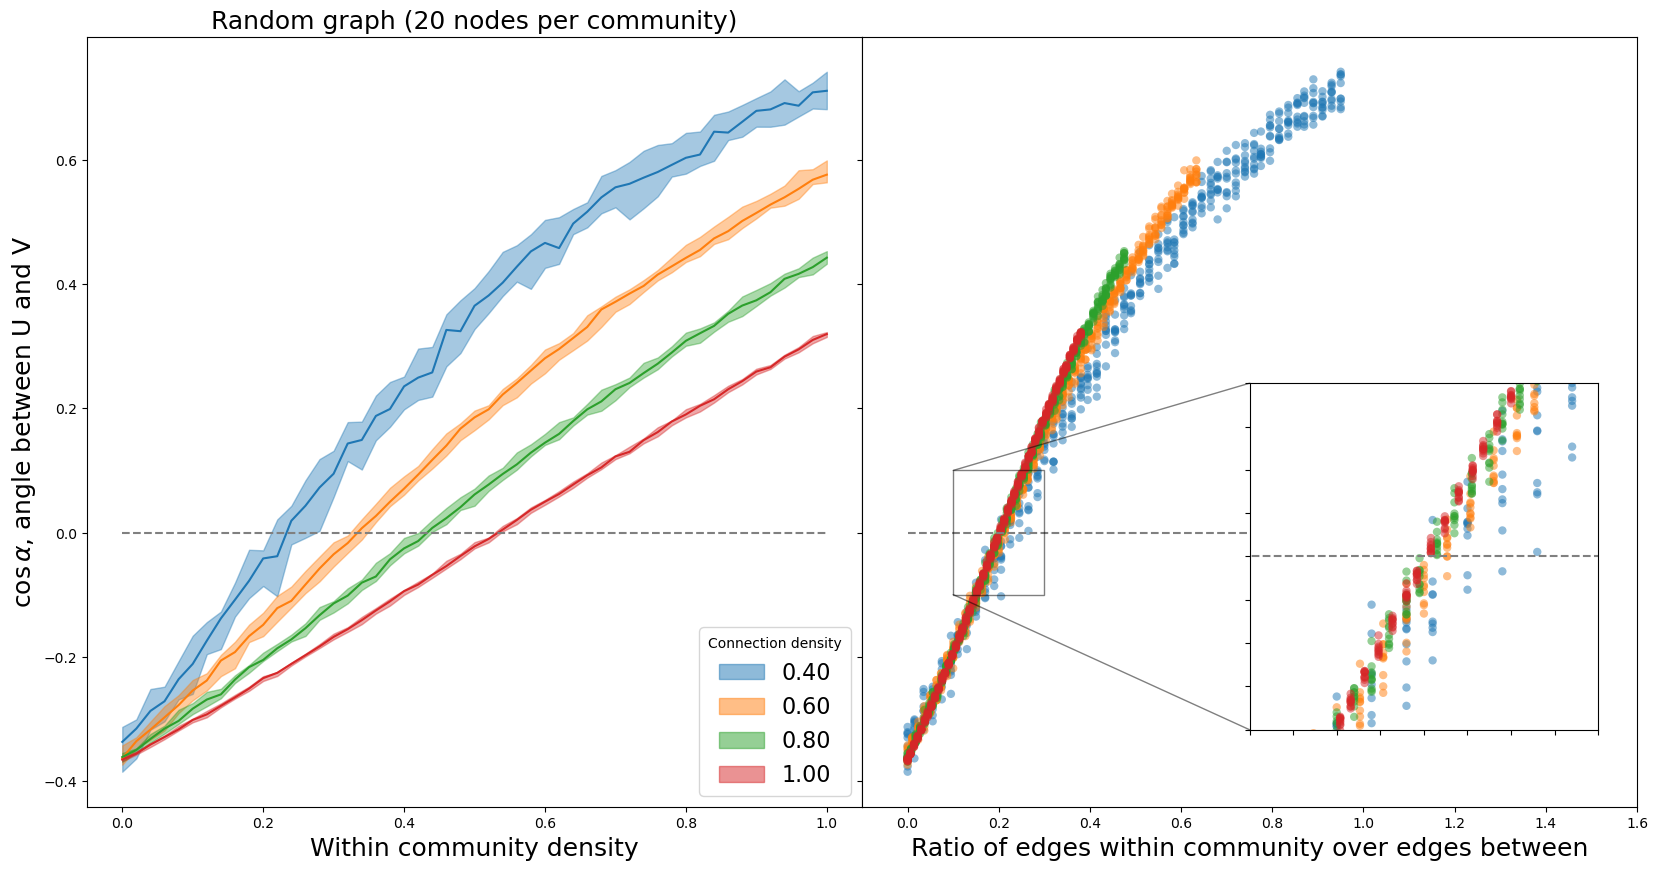

In [69]:
importlib.reload(plot)
from tqdm.notebook import tqdm
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

#plot.plot_community_scheme()

n_trials = 10
n_per_com = 20
density_value = .6
for_overleaf = True

densities = np.linspace(0, 1, 51)

#con_dens = [0.2, 0.5, 0.75, 1]
con_dens = [0.4, 0.6, 0.8, 1]

colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', "tab:purple"]
cmap = plt.get_cmap("tab10", 10)
colors = [cmap(i) for i in range(10)]

fig, all_axes = plt.subplots(ncols=2, figsize=(20, 10), sharey=True, gridspec_kw={'wspace': 0})

# Zoom
x12, x22, y12, y22 = 0.4, 0.6, -0.1, 0.1
x12, x22, y12, y22 = 0.1, 0.3, -0.1, 0.1
ax_zoom = all_axes[1].inset_axes(
    #[0.1, 0.5, 0.45, 0.45],
    [0.5, 0.1, 0.45, 0.45],
    xlim=(x12, x22), ylim=(y12, y22), xticklabels=[], yticklabels=[])

uv_medians = np.zeros((len(con_dens), len(densities)))
uv_minmax = np.zeros((len(con_dens), len(densities), 2))

ratios = np.zeros((len(con_dens), len(densities)))

for j, c in enumerate(con_dens):
    for k, d in enumerate(densities):
        s = []
        uv_angle = []
        for n in range(n_trials):
            # Building the graph
            seed = np.random.randint(0, 1000)
            graph = dgsp_graphs.toy_n_communities(n_per_com, 4, com_density=d,
                                                  connect_density=[c, c, 0, c, c, c],
                                                  #connect_density=[1, 1, 0, 1, 1, 1],
                                                  connect_out_prob=[0.8, 1-0.8, 1-0.8, 0.5, 0.8, 1-0.8], seed=seed+n)#, seed=1234)
            
            n_edges_within = 0
            graph_no_com = graph.copy()

            for i in range(4):
                slice_within = slice(n_per_com*i, n_per_com*(i+1))
                n_edges_within += np.sum(graph[slice_within][:, slice_within] > 0)

                graph_no_com[slice_within][:, slice_within] = 0

            n_edges_con = np.sum(graph_no_com > 0)

            #print(f"Ratio of com edges over con edges: {n_edges_within/n_edges_con:1.2f}")

            U, S, Vh = dgsp.sorted_SVD(dgsp.modularity_matrix(graph), fix_negative=False)
            V = Vh.T
            vect_id = np.argmax(np.abs(S))

            #u_v_angle = U[:, vect_id].T @ V[:, vect_id]
            u_v_angle = V[:, vect_id] @ U[:, vect_id].T

            s.append(S[vect_id])
            uv_angle.append(u_v_angle)
        
            #all_axes[1].scatter(d/c, u_v_angle, color=colors[j], marker="o", alpha=.5, edgecolor='none')
            #ax_zoom.scatter(d/c, u_v_angle, color=colors[j], marker="o", alpha=.5, edgecolor='none')
            all_axes[1].scatter(n_edges_within/n_edges_con, u_v_angle, color=colors[j], marker="o", alpha=.5, edgecolor='none')
            ax_zoom.scatter(n_edges_within/n_edges_con, u_v_angle, color=colors[j], marker="o", alpha=.5, edgecolor='none')
            
        uv_medians[j, k] = np.median(uv_angle)
        uv_minmax[j, k] = [np.min(uv_angle), np.max(uv_angle)]
    
    #all_axes[1].plot(densities/c, uv_medians[j], color=colors[j], lw=1, alpha=.5, zorder=0)
    #all_axes[1].fill_between(densities/c, uv_minmax[j, :, 0], uv_minmax[j, :, 1], alpha=.4, color=colors[j])

all_axes[0].plot(densities, uv_medians.T)

for col_i, _ in enumerate(con_dens):
    all_axes[0].fill_between(densities, uv_minmax[col_i, :, 0], uv_minmax[col_i, :, 1], alpha=.4, color=colors[col_i])

all_axes[1].indicate_inset_zoom(ax_zoom, edgecolor="black")

legend_elements = [Patch(facecolor=col, alpha=.5, edgecolor=col, label=f"{c:1.2f}") for col, c in zip(colors, con_dens)]
all_axes[0].legend(handles=legend_elements, loc="lower right", fontsize=16, title="Connection density")

for ax in all_axes:
    ax.hlines(0, 0, 1, color='gray', linestyle='--')

ax_zoom.hlines(0, 0, 1, color='gray', linestyle='--')
ax_zoom.vlines(0.5, -1, 1, color='gray', linestyle='--')

all_axes[0].set_title(f"Random graph ({n_per_com} nodes per community)", fontsize=18)
all_axes[0].set_xlabel("Within community density", fontsize=18)
all_axes[0].set_ylabel("$\cos \\alpha$, angle between U and V", fontsize=18)

all_axes[1].set_xlabel("Ratio of edges within community over edges between", fontsize=18)
all_axes[1].set_xlim(-0.1, 1.6)

fig.savefig(op.join(path_to_figures, "SI-AntiMod-TwoComs-Ratios.png"), bbox_inches='tight', dpi=300)

In [4]:
importlib.reload(plot)
from tqdm.notebook import tqdm
#plot.plot_community_scheme()

n_trials = 10
n_per_com = 20

densities = np.linspace(0, 1, 21)
con_dens = np.linspace(0.1, 1, 20)

all_angles = np.zeros((len(densities), len(con_dens)))
all_angles_undir = np.zeros((len(densities), len(con_dens)))

for i, d in enumerate(tqdm(densities)):
    for j, c in enumerate(con_dens):
        for n in range(n_trials):
            # Building the graph
            seed = np.random.randint(0, 1000)
            graph = dgsp_graphs.toy_n_communities(n_per_com, 4, com_density=d,
                                                connect_density=[c, c, 0, c, c, c],
                                                #connect_density=[1, 1, 0, 1, 1, 1],
                                                connect_out_prob=[0.8, 1-0.8, 1-0.8, 0.5, 0.8, 1-0.8], seed=seed+n)#, seed=1234)
            
            U, S, Vh = dgsp.sorted_SVD(dgsp.modularity_matrix(graph), fix_negative=False)
            V = Vh.T
            
            vect_id = np.argmax(np.abs(S))

            #u_v_angle = U[:, vect_id].T @ V[:, vect_id]
            u_v_angle = V[:, vect_id] @ U[:, vect_id].T

            all_angles[i, j] += (u_v_angle / n_trials)

            undir = dgsp_graphs.toy_random(n_per_com*2, edge_prob=d, con_prob=c)
            U, S, Vh = dgsp.sorted_SVD(dgsp.modularity_matrix(undir), fix_negative=False)
            V = Vh.T

            vect_id = np.argmax(np.abs(S))
            #all_angles_undir[i, j] += (S[vect_id] / n_trials)
            all_angles_undir[i, j] += (V[:, vect_id] @ U[:, vect_id].T / n_trials)


  0%|          | 0/21 [00:00<?, ?it/s]

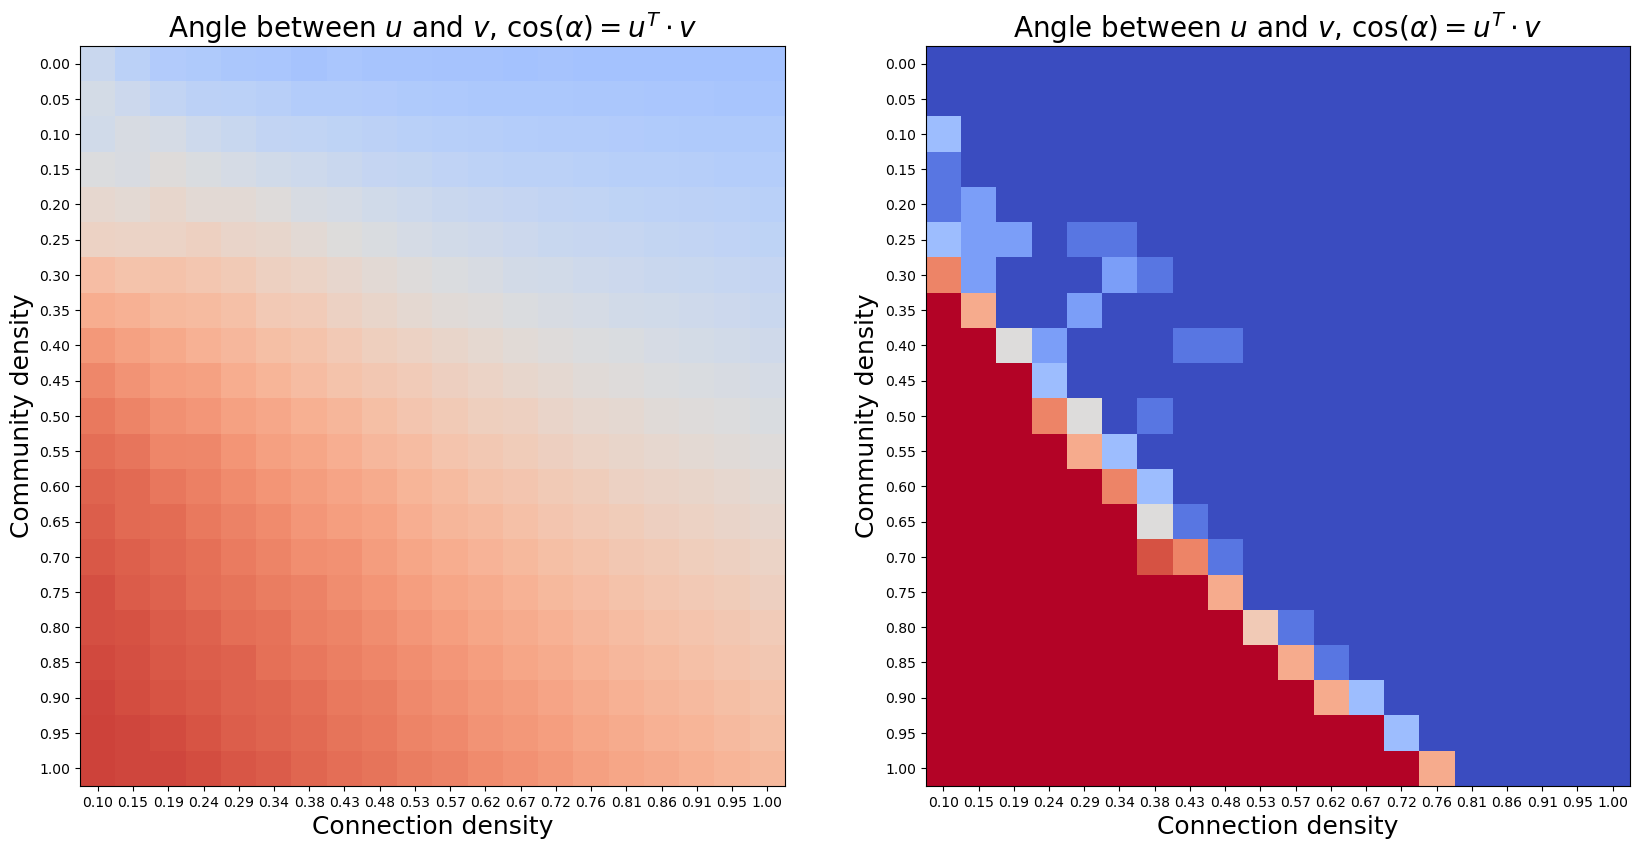

In [30]:
fig, axes = plt.subplots(ncols=2, figsize=(2*10, 10))

densities = np.linspace(0, 1, 21)
con_dens = np.linspace(0.1, 1, 20)

min_maxes = [[-1, 1], [-1, 1]]
for ax, mx, minmax in zip(axes, [all_angles, all_angles_undir], min_maxes):
    ax.imshow(mx, cmap='coolwarm', vmin=minmax[0], vmax=minmax[1])
    ax.set_title("Angle between $u$ and $v$, $\cos(\\alpha)=u^T\cdot v$", fontsize=20)
    ax.set_xticks(np.arange(len(con_dens)), labels = [f"{c:.2f}" for c in con_dens])
    ax.set_yticks(np.arange(len(densities)), labels = [f"{d:.2f}" for d in densities])
    ax.set_xlabel("Connection density", fontsize=18)
    ax.set_ylabel("Community density", fontsize=18)

fig.savefig(op.join(path_to_figures, "SI-AntiMod-TwoComs-Imshow.png"), bbox_inches='tight', dpi=100)

True
True
True


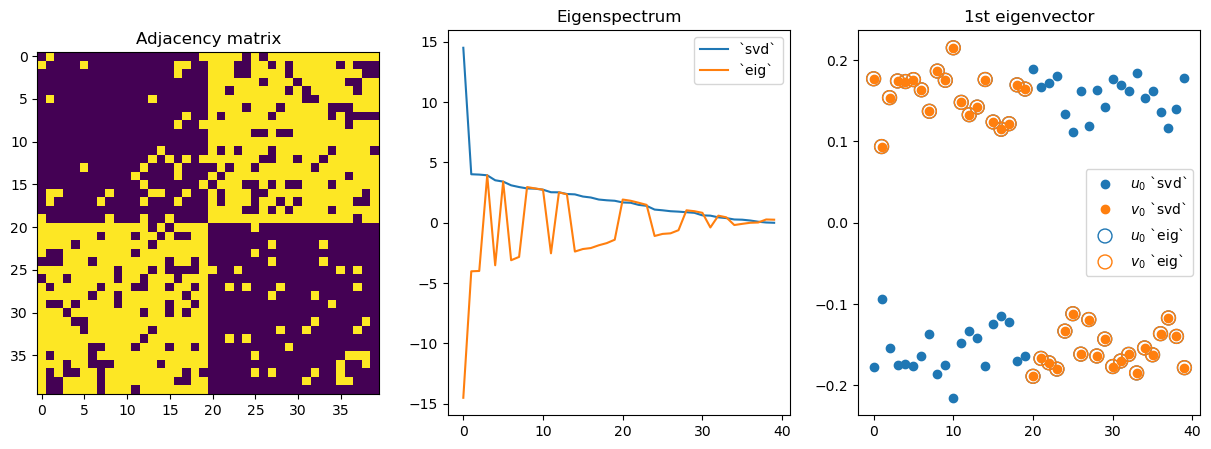

In [29]:
from numpy.linalg import eig, svd
from scipy.linalg import ishermitian
from scipy.linalg import eig as eig_scipy

mod_i = 3
undir = dgsp_graphs.toy_random(n_per_com*2, edge_prob=.1, con_prob=.8)

print(np.allclose(undir, undir.T))
print(ishermitian((undir)))
print(ishermitian(dgsp.modularity_matrix(undir)))

U, S, Vh = dgsp.sorted_SVD(dgsp.modularity_matrix(undir), fix_negative=False)
U, S, Vh = svd(dgsp.modularity_matrix(undir))
V = Vh.T

fig, axes = plt.subplots(ncols=3, figsize=(3*5, 5))

axes[1].plot(S, label="`svd`")
axes[2].plot(U[:, vect_id], ls="none", marker="o", label="$u_0$ `svd`")
axes[2].plot(V[:, vect_id], ls="none", marker="o", label="$v_0$ `svd`")

#S, V = eig(dgsp.modularity_matrix(undir))
S, V = eig_scipy(dgsp.modularity_matrix(undir))
U=V

vect_id = np.argmax(np.abs(S))

axes[0].imshow(undir)
axes[0].set_title("Adjacency matrix")
axes[1].plot(S, label="`eig`")
axes[1].set_title("Eigenspectrum")
axes[1].legend()
axes[2].scatter(np.arange(len(S)), U[:, vect_id], marker="o", color="none", s=100, edgecolor="tab:blue", label="$u_0$ `eig`")
axes[2].scatter(np.arange(len(S)), V[:, vect_id], marker="o", color="none", s=100, edgecolor="tab:orange", label="$v_0$ `eig`")
axes[2].set_title("1st eigenvector")
axes[2].legend()

fig.savefig(op.join(path_to_figures, f"SI-AntiMod-TwoComs-Spectrum{mod_i:02d}.png"), bbox_inches='tight', dpi=100)

<Axes: title={'center': 'Singular vector embedding'}, xlabel='Left singular vector $u_{1}$', ylabel='Right singular vector $v_{1}$'>

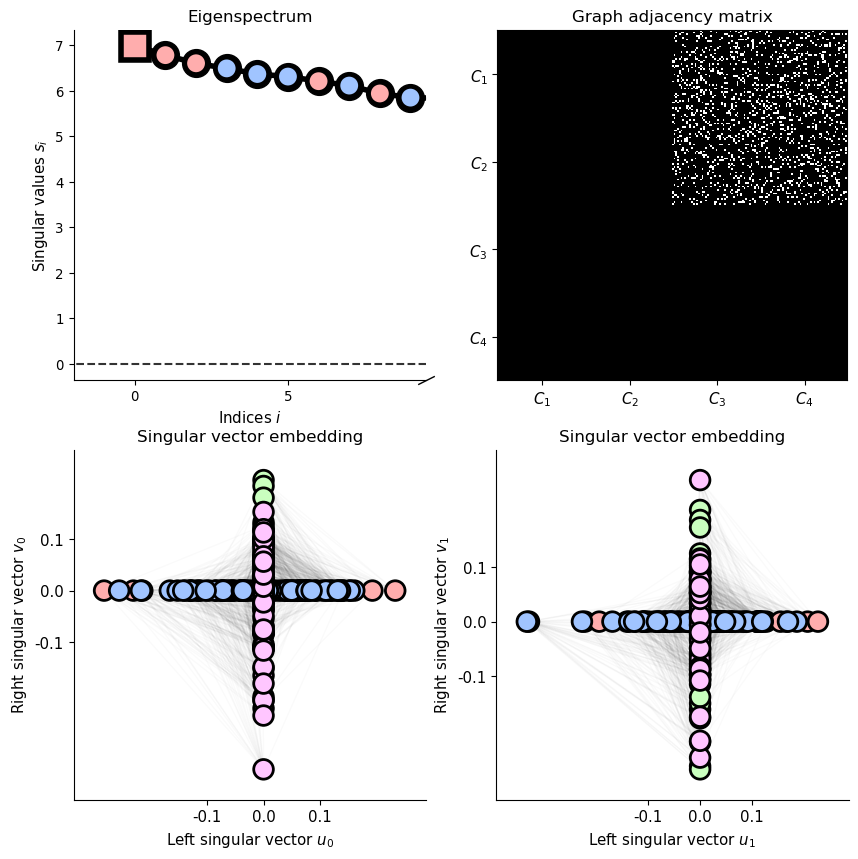

In [120]:
importlib.reload(plot)

n_per_com = 100
random_part = (np.random.normal(0, 1, (n_per_com, n_per_com)) > 1).astype(int)
graph = np.vstack([np.hstack([np.zeros((n_per_com, n_per_com)), random_part]), np.zeros((n_per_com, 2*n_per_com))])
#graph = np.vstack([np.hstack([np.zeros((10, 10)), random_part]), np.hstack([random_part.T, np.zeros((10, 10))])])
#graph = np.vstack([np.hstack([random_part, random_part]), np.hstack([random_part.T, np.zeros((10, 10))])])

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

U, S, Vh = dgsp.sorted_SVD(dgsp.modularity_matrix(graph), fix_negative=False)
V = Vh.T

vect_id = np.argmax(S)

plot.plot_spectrum(graph, fix_negative=False, split_ax=False, ax=axes[0, 0], fig=fig, show_n_eig=10, vector_id=vect_id, fontscale=0.6)
plot.plot_adjacency(graph, use_cmap=False, ax=axes[0, 1], fontscale=0.6)
plot.plot_graph_embedding(graph, directed_edges=False, fix_negative=True, ax=axes[1, 0], vector_id=0, fontscale=0.6)
plot.plot_graph_embedding(graph, directed_edges=False, fix_negative=True, ax=axes[1, 1], vector_id=1, fontscale=0.6)

<Axes: title={'center': 'Singular vector embedding'}, xlabel='Left singular vector $u_{1}$', ylabel='Right singular vector $v_{1}$'>

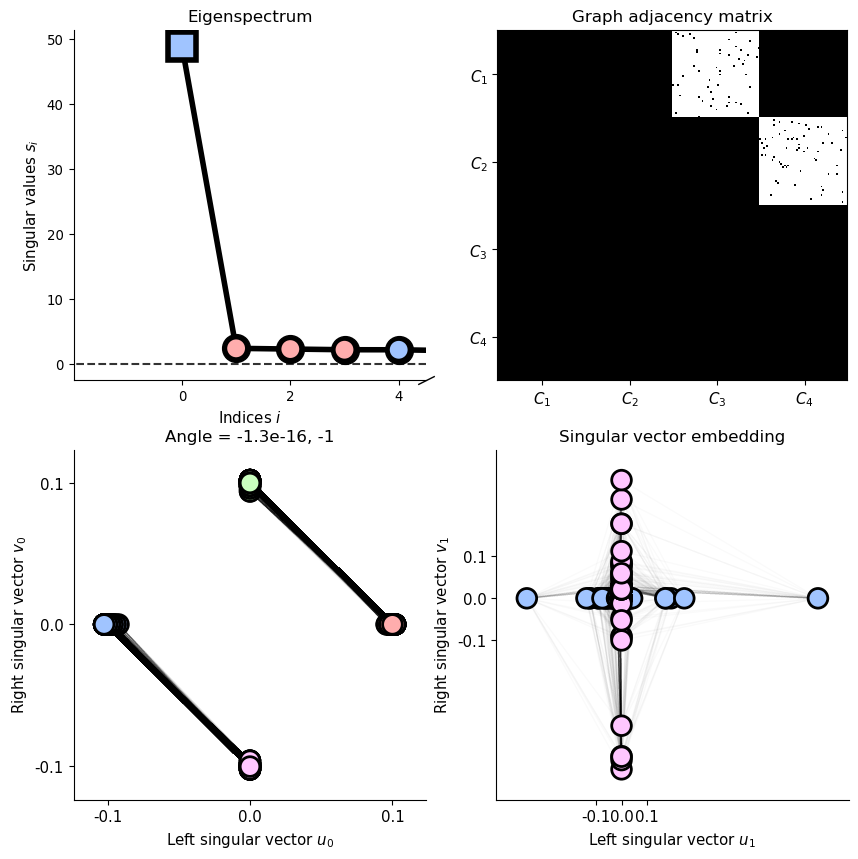

In [7]:
importlib.reload(plot)

n_per_com = 50
random_part = (np.random.normal(0, 1, (2, n_per_com, n_per_com)) > -2).astype(int)
A = np.zeros((2*n_per_com, 2*n_per_com))
B = np.vstack([np.hstack([random_part[0], np.zeros_like(random_part[0])]),
               np.hstack([np.zeros_like(random_part[0]), random_part[1]])])
C = A
D = A
graph = np.vstack([np.hstack([A, B]), np.hstack([C, D])])
#graph = np.vstack([np.hstack([np.zeros((10, 10)), random_part]), np.hstack([random_part.T, np.zeros((10, 10))])])
#graph = np.vstack([np.hstack([random_part, random_part]), np.hstack([random_part.T, np.zeros((10, 10))])])

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

U, S, Vh = dgsp.sorted_SVD(dgsp.modularity_matrix(graph), fix_negative=False)
V = Vh.T

vect_id = np.argmax(S)

plot.plot_spectrum(graph, fix_negative=False, split_ax=False, ax=axes[0, 0], fig=fig,
                   show_n_eig=5, vector_id=vect_id, fontscale=0.6)
plot.plot_adjacency(graph, use_cmap=False, ax=axes[0, 1], fontscale=0.6)
plot.plot_graph_embedding(graph, directed_edges=False, fix_negative=False, ax=axes[1, 0], vector_id=0, fontscale=0.6,
                          override_title=f"Angle = {U[:, 0] @ V[:, 0]:1.1e}, {np.sign(U[:, 0] @ V[:, 0]).astype(int):1d}")
plot.plot_graph_embedding(graph, directed_edges=False, fix_negative=False, ax=axes[1, 1], vector_id=1, fontscale=0.6)

(array([30.,  0., 20.]),
 array([-1.5, -0.5,  0.5,  1.5]),
 <BarContainer object of 3 artists>)

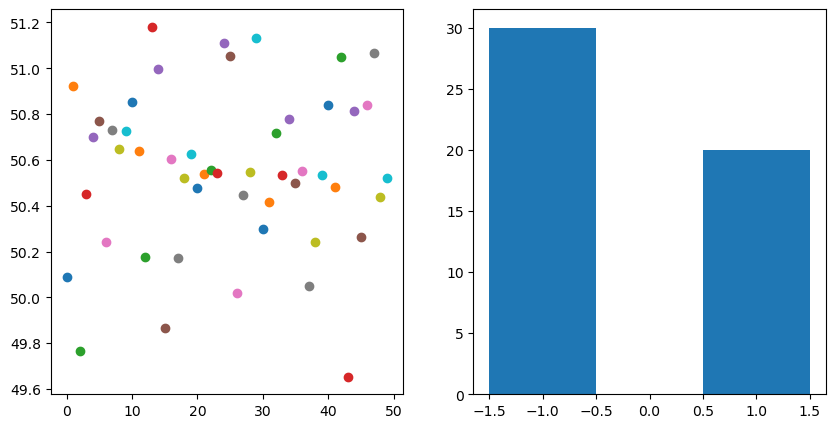

In [169]:
n_trials = 50
n_per_com = 100

vect_id = 0

fig, axes = plt.subplots(ncols=2, figsize=(10, 5))

all_angles = []
for t in range(n_trials):
    random_part = (np.random.normal(0, 1, (2, n_per_com, n_per_com)) > 0).astype(int)
    A = np.zeros((2*n_per_com, 2*n_per_com))
    B = np.vstack([np.hstack([np.zeros_like(random_part[0]), random_part[0]]),
                np.hstack([random_part[1], np.zeros_like(random_part[0])])])
    C = A
    D = A
    graph = np.vstack([np.hstack([A, B]), np.hstack([C, D])])

    
    U, S, Vh = dgsp.sorted_SVD(dgsp.modularity_matrix(graph), fix_negative=False)
    V = Vh.T

    #all_angles.append(V[:, vect_id] @ U[:, vect_id].T)
    all_angles.append(U[:, vect_id] @ V[:, vect_id])
    
    #axes[0].plot(S[:10], "o-")
    #axes[0].plot(S, "o-")
    axes[0].scatter(t, S[0])

#axes[0].plot(all_angles)
axes[1].hist(np.sign(all_angles), bins=np.linspace(-1.5, 1.5, 4))
#plt.plot(all_angles)